In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('10 cancer.csv')

In [3]:
df

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,B,22,14,78,451,0.105,0.071,0.190,0.066
97,B,19,27,62,295,0.102,0.053,0.135,0.069
98,B,21,24,74,413,0.090,0.075,0.162,0.066


In [4]:
df=pd.get_dummies(df)

In [5]:
df

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result_B,diagnosis_result_M
0,23,12,151,954,0.143,0.278,0.242,0.079,0,1
1,9,13,133,1326,0.143,0.079,0.181,0.057,1,0
2,21,27,130,1203,0.125,0.160,0.207,0.060,0,1
3,14,16,78,386,0.070,0.284,0.260,0.097,0,1
4,9,19,135,1297,0.141,0.133,0.181,0.059,0,1
...,...,...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056,0,1
96,22,14,78,451,0.105,0.071,0.190,0.066,1,0
97,19,27,62,295,0.102,0.053,0.135,0.069,1,0
98,21,24,74,413,0.090,0.075,0.162,0.066,1,0


In [6]:
x=df.drop(columns=['diagnosis_result_B','diagnosis_result_M'])

In [7]:
x

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056
96,22,14,78,451,0.105,0.071,0.190,0.066
97,19,27,62,295,0.102,0.053,0.135,0.069
98,21,24,74,413,0.090,0.075,0.162,0.066


In [8]:
y=df['diagnosis_result_B']

In [9]:
y

0     0
1     1
2     0
3     0
4     0
     ..
95    0
96    1
97    1
98    1
99    0
Name: diagnosis_result_B, Length: 100, dtype: uint8

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt=DecisionTreeClassifier()

In [14]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred=dt.predict(x_test)

In [16]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1],
      dtype=uint8)

In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

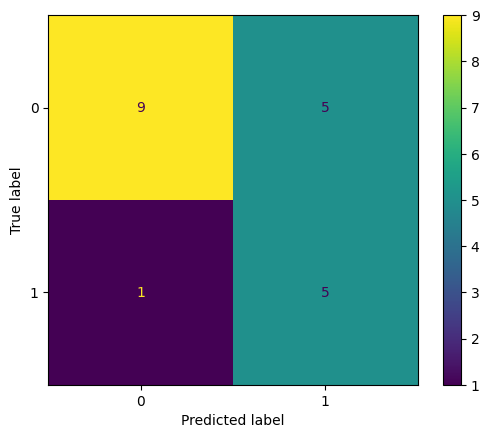

In [18]:
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.50      0.83      0.62         6

    accuracy                           0.70        20
   macro avg       0.70      0.74      0.69        20
weighted avg       0.78      0.70      0.71        20



In [30]:
from sklearn.tree import export_text

In [31]:
print( export_text(dt))

|--- feature_5 <= 0.10
|   |--- feature_7 <= 0.06
|   |   |--- feature_6 <= 0.18
|   |   |   |--- class: 0
|   |   |--- feature_6 >  0.18
|   |   |   |--- class: 1
|   |--- feature_7 >  0.06
|   |   |--- class: 1
|--- feature_5 >  0.10
|   |--- feature_3 <= 526.00
|   |   |--- feature_4 <= 0.11
|   |   |   |--- class: 1
|   |   |--- feature_4 >  0.11
|   |   |   |--- feature_4 <= 0.13
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  0.13
|   |   |   |   |--- class: 1
|   |--- feature_3 >  526.00
|   |   |--- feature_6 <= 0.24
|   |   |   |--- feature_1 <= 22.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  22.50
|   |   |   |   |--- feature_6 <= 0.21
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.21
|   |   |   |   |   |--- feature_0 <= 11.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  11.00
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_6 >  0.24
|   |   |   |--- feature_6 <= 0.24
|   |   |   |

In [34]:
from sklearn.tree import plot_tree

In [35]:
import matplotlib.pyplot as plt

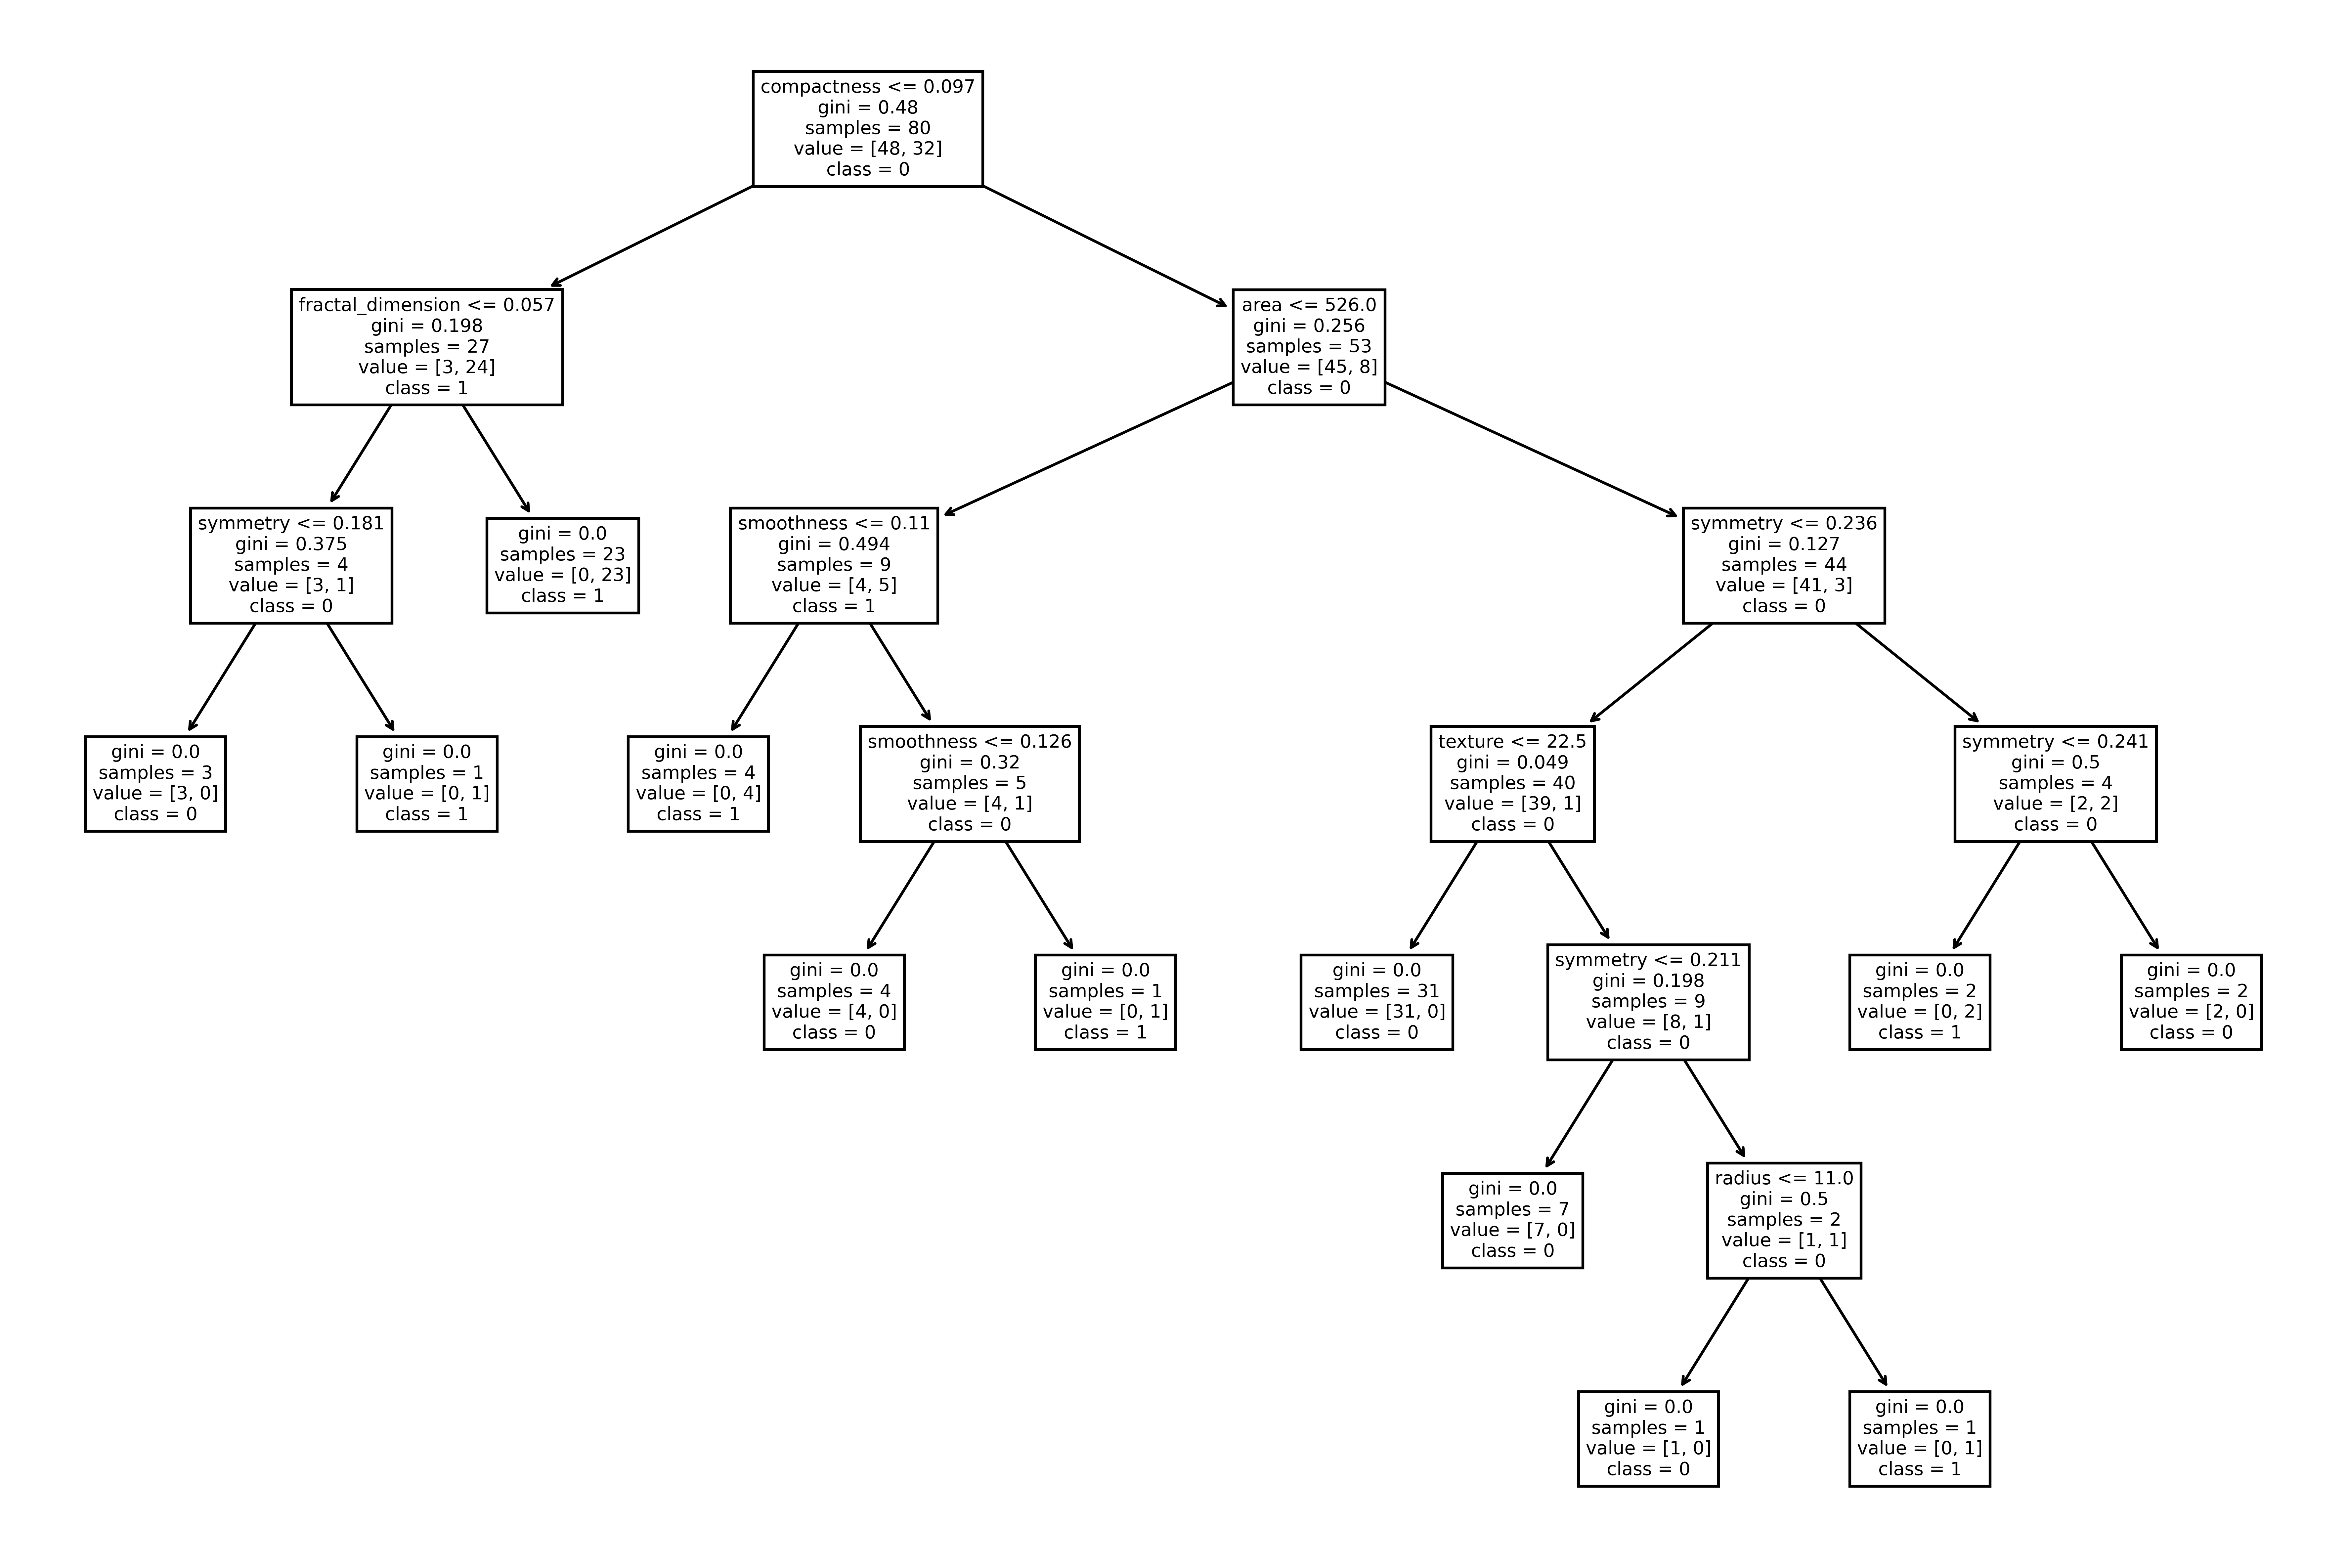

In [37]:
plt.figure(figsize=(15,10),dpi=600)
y=plot_tree(dt,feature_names=x.columns,class_names=['0','1'])

# RANDOM FOREST

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rm=RandomForestClassifier(n_estimators=5)

In [23]:
rm.fit(x_test,y_test)

RandomForestClassifier(n_estimators=5)

In [24]:
y_pred=rm.predict(x_test)

In [25]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
      dtype=uint8)

In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

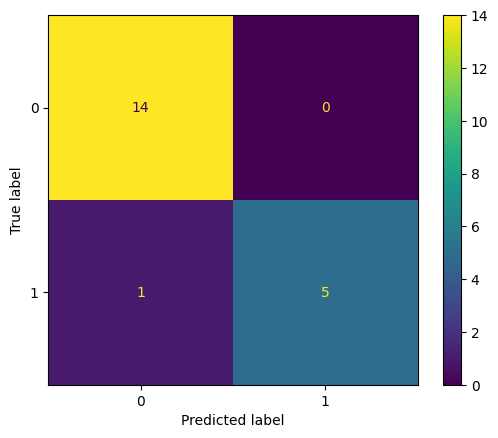

In [27]:
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



In [29]:
rm=RandomForestClassifier(n_estimators=55)
rm.fit(x_test,y_test)
y_pred=rm.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

